In [ ]:
import pandas as pd
df=pd.read_csv("/content/diabetes.csv")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df['Outcome']=np.where(df['Outcome']==1,"diabetic","non-diabetic")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,diabetic
1,1,85,66,29,0,26.6,0.351,31,non-diabetic
2,8,183,64,0,0,23.3,0.672,32,diabetic
3,1,89,66,23,94,28.1,0.167,21,non-diabetic
4,0,137,40,35,168,43.1,2.288,33,diabetic


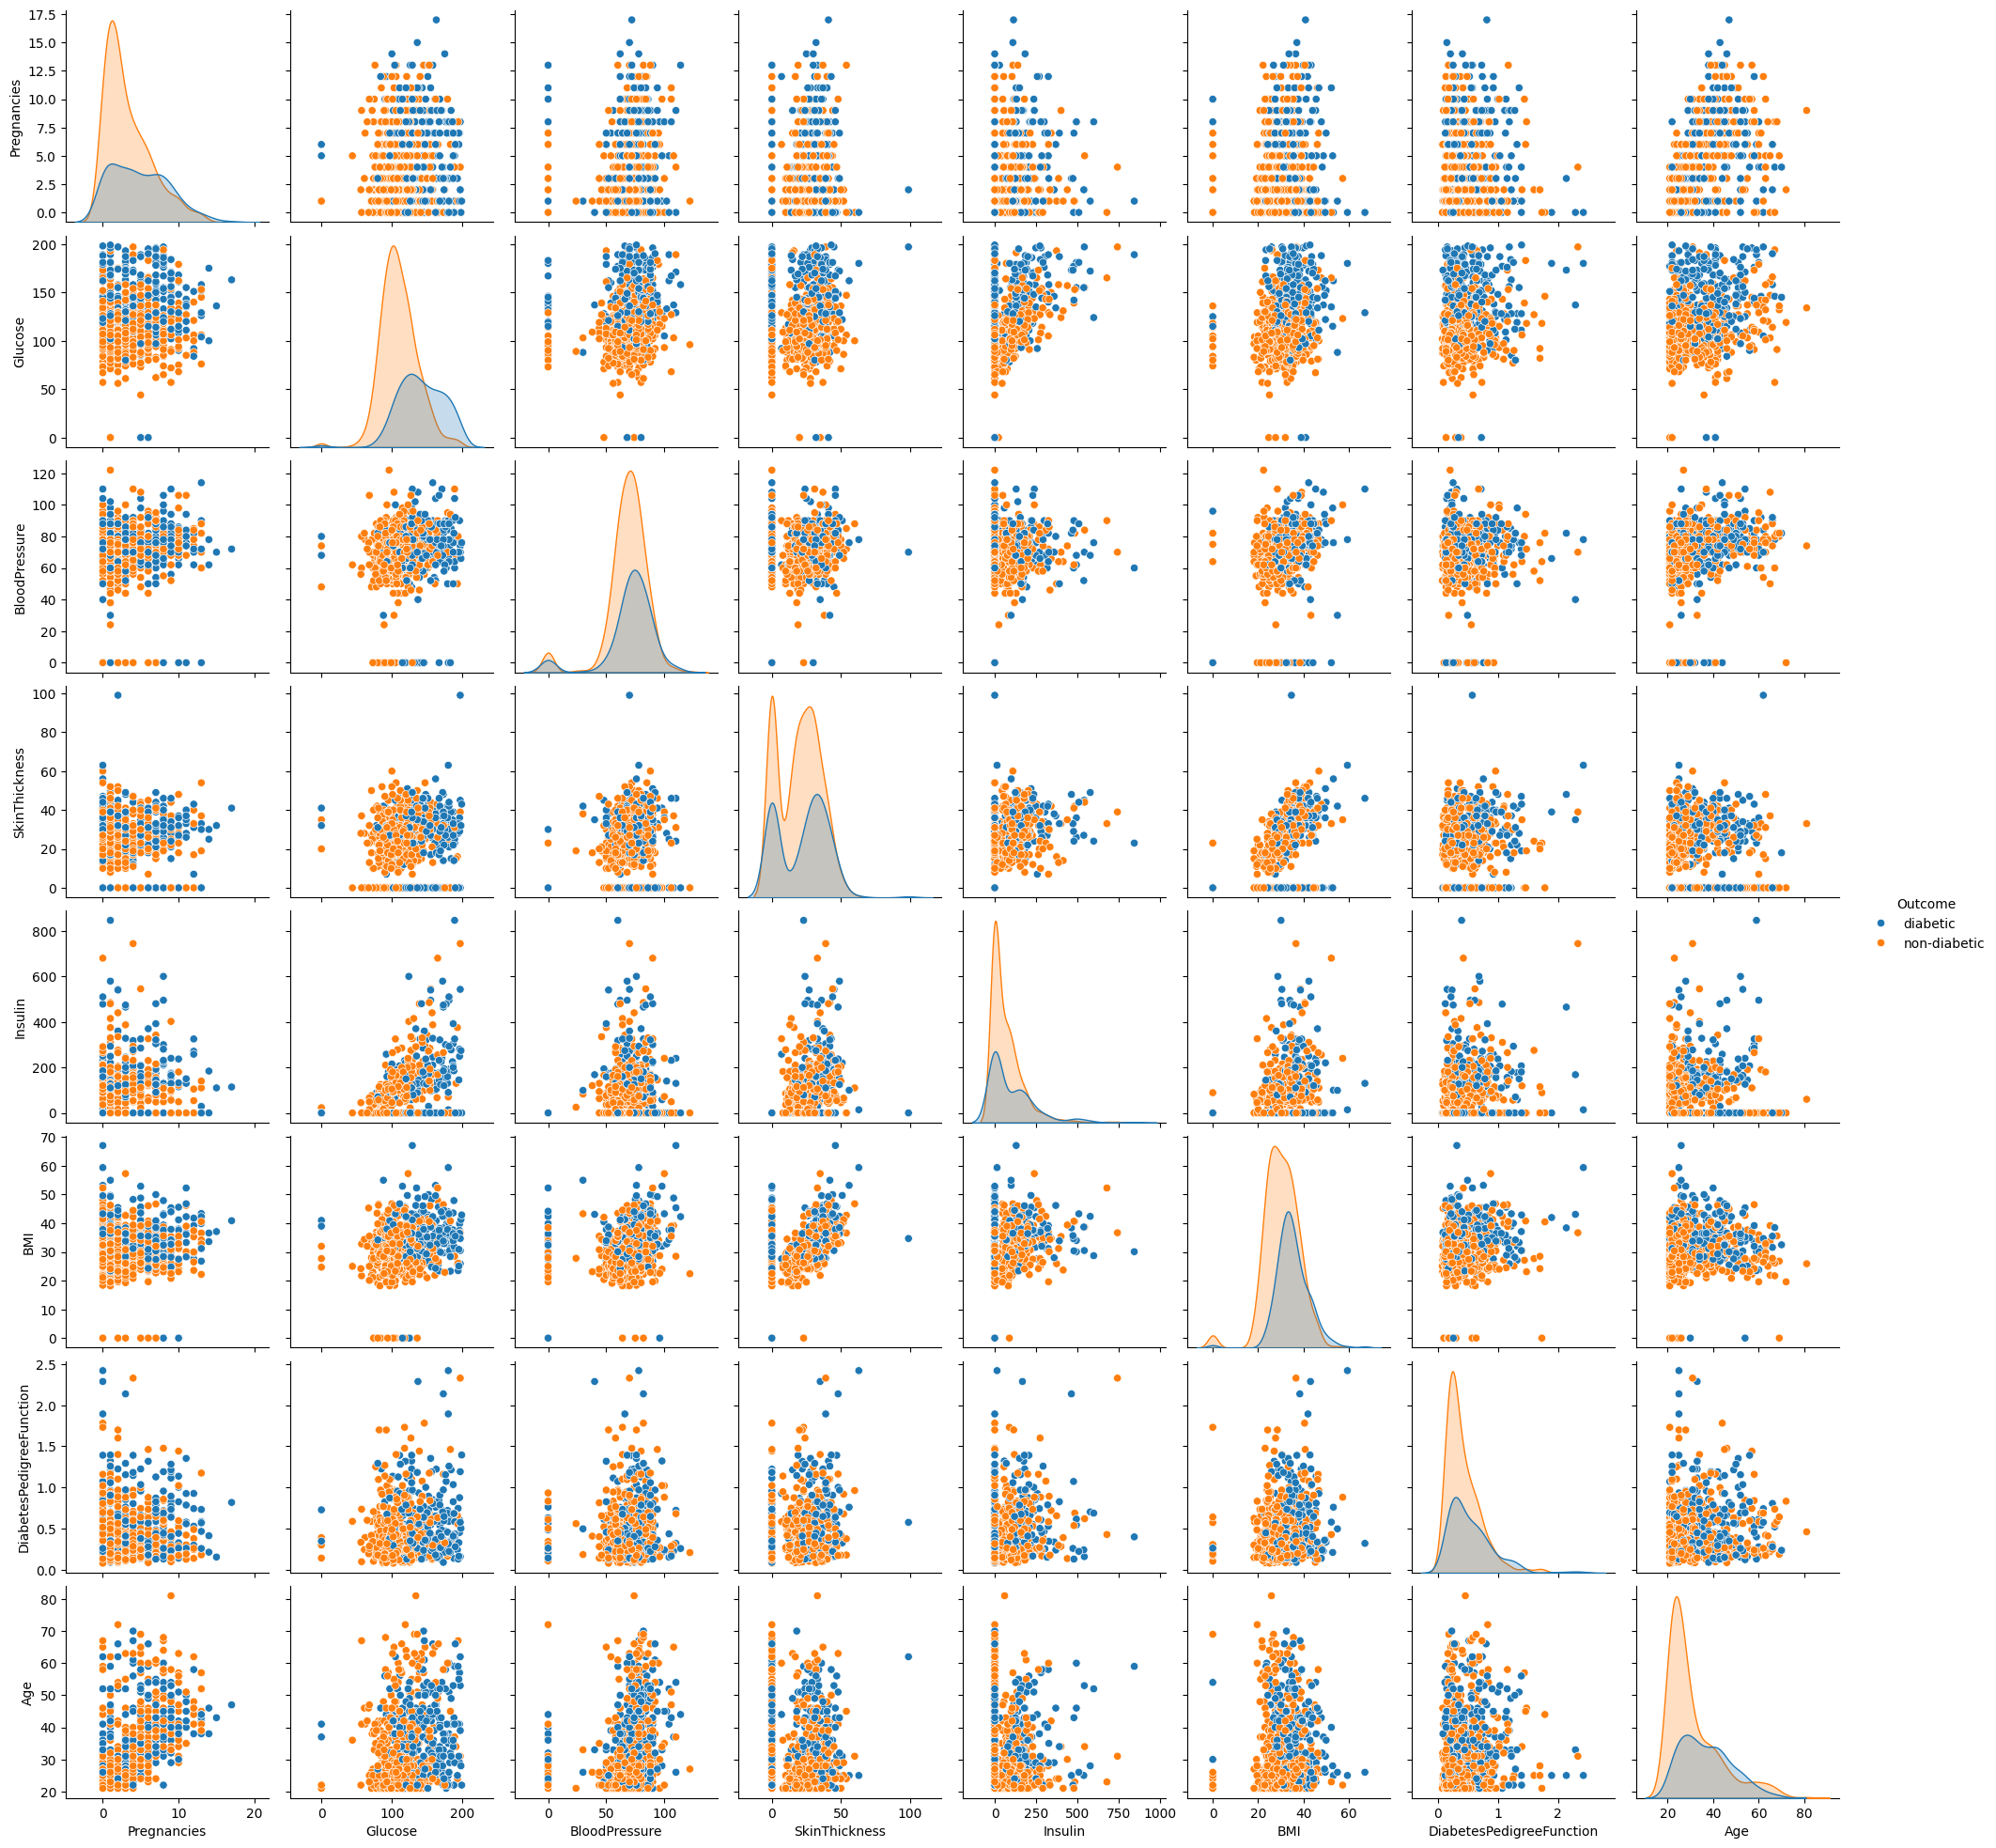

In [ ]:
sns.pairplot(df,hue='Outcome')

In [ ]:
df=pd.read_csv("/content/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
x=df.drop('Outcome',axis=1).values
y=df['Outcome'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
#Creating tensors
x_train=torch.FloatTensor(x_train)
x_test=torch.FloatTensor(x_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [ ]:
df.shape

(768, 9)

In [ ]:
#creating model with pytorch
class ANN_model(nn.Module):
  def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
    super().__init__()
    self.f_connected1=nn.Linear(input_features,hidden1)
    self.f_connected2=nn.Linear(hidden1,hidden2)
    self.out=nn.Linear(hidden2,out_features)
  def forward(self,x):
    x=F.relu(self.f_connected1(x))
    x=F.relu(self.f_connected2(x))
    x=self.out(x)
    return x

In [ ]:
#Instantiate my ANN_model
torch.manual_seed(20)
model=ANN_model()

In [ ]:
model.parameters

<bound method Module.parameters of ANN_model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [ ]:
#Backward Propagation
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [ ]:
#Train the model
epochs=500
final_losses=[]
for i in range(epochs):
  i=i+1
  y_pred=model.forward(x_train)
  loss=loss_function(y_pred,y_train)
  final_losses.append(loss)
  if i%10==1:
    print("Epoch number: {} and the loss: {}".format(i,loss.item()))
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch number: 1 and the loss: 3.436734199523926
Epoch number: 11 and the loss: 0.7937087416648865
Epoch number: 21 and the loss: 0.6007902026176453
Epoch number: 31 and the loss: 0.5869321227073669
Epoch number: 41 and the loss: 0.5715521574020386
Epoch number: 51 and the loss: 0.5586212277412415
Epoch number: 61 and the loss: 0.5482381582260132
Epoch number: 71 and the loss: 0.5397810339927673
Epoch number: 81 and the loss: 0.5326844453811646
Epoch number: 91 and the loss: 0.5248878598213196
Epoch number: 101 and the loss: 0.517898440361023
Epoch number: 111 and the loss: 0.5110313892364502
Epoch number: 121 and the loss: 0.5037928223609924
Epoch number: 131 and the loss: 0.49618738889694214
Epoch number: 141 and the loss: 0.48713064193725586
Epoch number: 151 and the loss: 0.4796719253063202
Epoch number: 161 and the loss: 0.4729849398136139
Epoch number: 171 and the loss: 0.46620768308639526
Epoch number: 181 and the loss: 0.45959973335266113
Epoch number: 191 and the loss: 0.453788

In [ ]:
import numpy as np

Text(0.5, 0, 'Epochs')

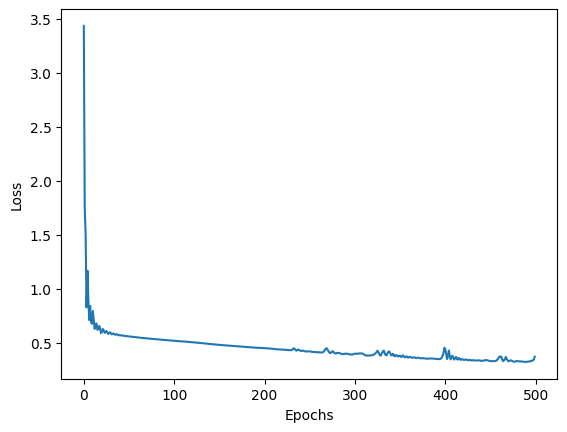

In [ ]:
#plot the loss function
%matplotlib inline
plt.plot(range(epochs),[loss.detach().numpy() for loss in final_losses]) # Detach tensors before converting to NumPy
plt.ylabel('Loss')
plt.xlabel('Epochs')

In [ ]:
with torch.no_grad():
  y_eval=model.forward(x_test)
  loss=loss_function(y_eval,y_test) # Use the loss_function to calculate the loss
  print(loss.item())

0.8745235204696655


In [ ]:
#prediction in x_test data
prediction=[]
with torch.no_grad():#basically turn off the back propagation
  for i,data in enumerate(x_test):
    y_pred=model(data)
    prediction.append(y_pred.argmax().item())
    print(y_pred.argmax().item())

1
0
0
0
1
1
0
0
1
1
0
1
1
0
0
1
0
0
1
1
1
0
1
0
1
1
0
0
0
0
1
1
1
1
1
1
1
0
0
1
0
0
1
1
0
1
1
0
0
1
0
1
1
0
1
0
0
0
0
1
1
1
1
1
0
1
0
1
0
0
1
0
0
0
0
0
1
0
0
0
1
0
0
0
0
1
1
1
0
0
0
0
0
0
1
1
0
0
1
0
1
0
1
1
1
0
1
1
0
1
0
0
0
1
0
1
1
0
0
1
0
0
0
0
1
0
0
1
1
1
1
1
0
1
1
0
0
1
0
0
0
0
0
0
0
1
1
0
0
1
1
0
1
0


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.84      0.71      0.77        99
           1       0.59      0.76      0.67        55

    accuracy                           0.73       154
   macro avg       0.72      0.74      0.72       154
weighted avg       0.75      0.73      0.73       154



In [ ]:
cm=confusion_matrix(y_test,prediction)
cm

array([[70, 29],
       [13, 42]])

Text(95.72222222222221, 0.5, 'Predicted values')

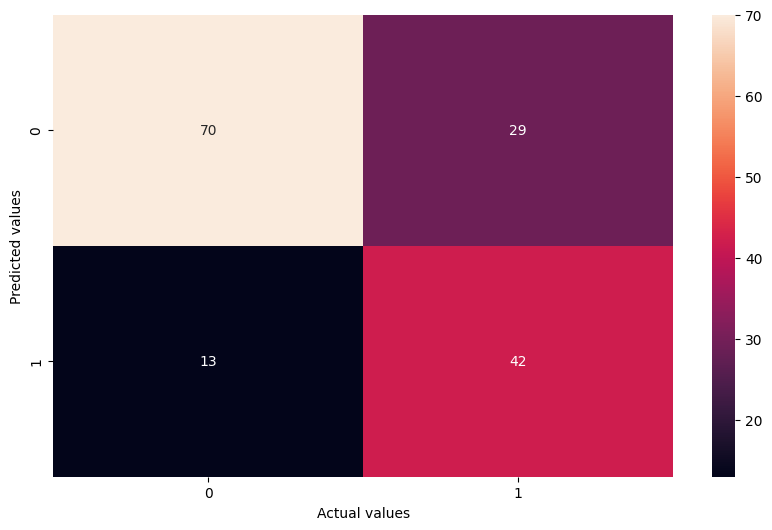

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

In [ ]:
#save the model
torch.save(model,'diabetes.pt')

In [ ]:
model=torch.load('diabetes.pt')

In [ ]:
model.eval()

ANN_model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [ ]:
#prediction of new datapoints
list(df.iloc[0,:-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [ ]:
#new data
list1=[6.0,130.0,72.0,40.0,0.0,25.6,0.627,45.0]

In [ ]:
new_data=torch.tensor(list1)

In [ ]:
#predict new data using pytorch
with torch.no_grad():
  print(model(new_data))
  print(model(new_data).argmax().item())

tensor([1.2310, 1.2895])
1
